In [1]:
import pandas
import matplotlib.pyplot as plt


In [2]:
data = pandas.read_csv("data.csv")
data.head()

,Kaggle1,Kaggle2,Kaggle3,Kaggle4,Kaggle5,Project-Teacher1,Project-Teacher2
0,6,5,6,6,6.0,17.5,18.0
1,6,4,5,6,3.0,15.0,12.5
2,6,6,5,3,3.0,14.0,14.5
3,6,6,5,3,3.0,16.5,18.5
4,5,5,5,6,6.0,17.5,18.0


In [3]:
# calculate means and standard deviations for each column
means = data.mean()
stds = data.std()

for i in range(len(means)):
    print(f"{means.index[i]}: {means[i]} +/- {stds[i]}")

Kaggle1: 5.333333333333333 +/- 0.5547001962252291
Kaggle2: 4.814814814814815 +/- 1.5698367636118935
Kaggle3: 5.37037037037037 +/- 0.49210287762341137
Kaggle4: 4.518518518518518 +/- 1.4772732253500644
Kaggle5: 4.203703703703703 +/- 1.8824046571997461
Project-Teacher1: 16.425925925925927 +/- 1.6390880655442792
Project-Teacher2: 16.166666666666668 +/- 2.2446517632945957


In [4]:
# normalize data last 2 columns to % (instead of /6 or /20)
data.iloc[:, 0:5] = data.iloc[:, 0:5] / 6 * 100
data.iloc[:, 5:7] = data.iloc[:, 5:7] / 20 * 100
# create a new column with the mean of all the kaggle scores (first 5 columns)
data["Kaggle"] = data.iloc[:, 0:5].mean(axis=1)
# create a new column with the mean of all the project scores (last 2 columns)
data["Project"] = data.iloc[:, 5:7].mean(axis=1)
data.head()

,Kaggle1,Kaggle2,Kaggle3,Kaggle4,Kaggle5,Project-Teacher1,Project-Teacher2,Kaggle,Project
0,100.000000,83.333333,100.000000,100.0,100.0,87.5,90.0,96.666667,88.75
1,100.000000,66.666667,83.333333,100.0,50.0,75.0,62.5,80.000000,68.75
2,100.000000,100.000000,83.333333,50.0,50.0,70.0,72.5,76.666667,71.25
3,100.000000,100.000000,83.333333,50.0,50.0,82.5,92.5,76.666667,87.50
4,83.333333,83.333333,83.333333,100.0,100.0,87.5,90.0,90.000000,88.75


In [5]:
# calculate means and standard deviations for each column
means = data.mean()
stds = data.std()
for i in range(len(means)):
    print(f"{means.index[i]}: {means[i]} +/- {stds[i]}")

Kaggle1: 88.88888888888889 +/- 9.245003270420483
Kaggle2: 80.24691358024691 +/- 26.163946060198228
Kaggle3: 89.50617283950618 +/- 8.201714627056852
Kaggle4: 75.30864197530865 +/- 24.621220422501075
Kaggle5: 70.06172839506172 +/- 31.373410953329103
Project-Teacher1: 82.12962962962963 +/- 8.195440327721395
Project-Teacher2: 80.83333333333333 +/- 11.22325881647298
Kaggle: 80.80246913580248 +/- 13.215588845778965
Project: 81.48148148148148 +/- 9.12675850440455


In [6]:
# variance under the assumption that scores are independent
print("kaggle variance if all independent:", (data.iloc[:, 0:5].var().sum()/25)**0.5)
print("project variance if both independent:", (data.iloc[:, 5:7].var().sum()/4)**0.5)

kaggle variance if all independent: 9.854513060876384
project variance if both independent: 6.948503087478278


"Good students perform well in all kaggle challenges" ; "Teachers do not mark randomly"

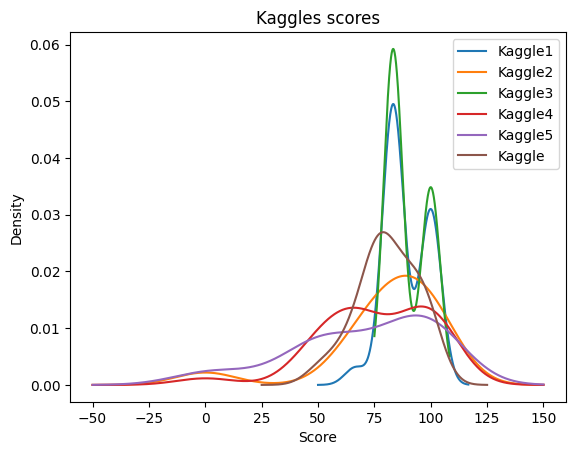

In [7]:
# plot the density of data points for kaggle column
data["Kaggle1"].plot.kde()
data["Kaggle2"].plot.kde()
data["Kaggle3"].plot.kde()
data["Kaggle4"].plot.kde()
data["Kaggle5"].plot.kde()
data["Kaggle"].plot.kde()
plt.legend()
plt.xlabel("Score")
plt.title("Kaggles scores")
plt.show()

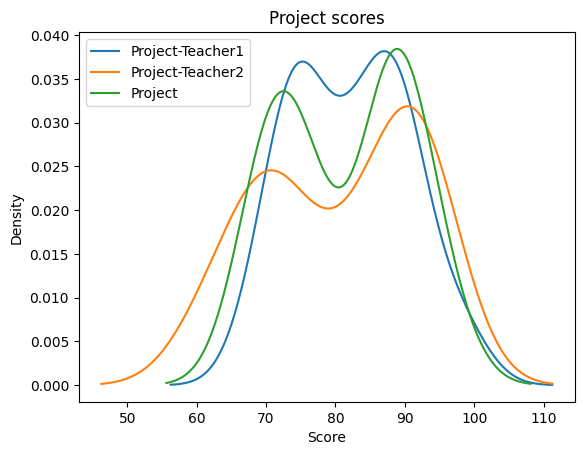

In [8]:
# plot the density of data points for kaggle column
data["Project-Teacher1"].plot.kde()
data["Project-Teacher2"].plot.kde()
data["Project"].plot.kde()
plt.legend()
plt.xlabel("Score")
plt.title("Project scores")
plt.show()

In [9]:
# calculate the correlation between all columns
data.corr()

,Kaggle1,Kaggle2,Kaggle3,Kaggle4,Kaggle5,Project-Teacher1,Project-Teacher2,Kaggle,Project
Kaggle1,1.000000,0.559469,0.234834,0.297262,0.300815,0.091655,0.355236,0.644172,0.259570
Kaggle2,0.559469,1.000000,-0.007376,-0.006757,0.123888,0.069202,0.358375,0.529620,0.251419
Kaggle3,0.234834,-0.007376,1.000000,0.096016,0.289102,0.178372,0.290162,0.327097,0.258493
Kaggle4,0.297262,-0.006757,0.096016,1.000000,0.610612,0.556533,0.471689,0.713356,0.539891
Kaggle5,0.300815,0.123888,0.289102,0.610612,1.000000,0.460071,0.594702,0.829339,0.572217
Project-Teacher1,0.091655,0.069202,0.178372,0.556533,0.460071,1.000000,0.761387,0.488172,0.917121
Project-Teacher2,0.355236,0.358375,0.290162,0.471689,0.594702,0.761387,1.000000,0.685734,0.956701
Kaggle,0.644172,0.529620,0.327097,0.713356,0.829339,0.488172,0.685734,1.000000,0.640806
Project,0.259570,0.251419,0.258493,0.539891,0.572217,0.917121,0.956701,0.640806,1.000000
